In [1]:
import pandas as pd
from numpy import nan
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\colefreeman\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
def openData():
    """
    Opens the csv with the data and cleans the dataset and returns a dataframe.
    """
    # Sort data in descending order by page visibility. This ensures duplicates without page followers are dropped.
#     data = pd.read_csv("../data/facebook_data_cleaned.csv").sort_values('visibility', ascending=False)
#     data = data.drop_duplicates(['altmetric_id'], keep='first')

    data = pd.read_csv("../data/facebook_data_cleaned.csv")
    
    data['fb_wall_urls'] = data['fb_wall_urls'].apply(lambda x: eval(x))
    
    def func(inp):
        if inp is nan:
            return inp
        try:
            res = eval(inp)
        except:
            res = [inp]
        return res
    
    data['subjects'] = data['subjects'].map(func)
    data['scopus_subjects'] = data['scopus_subjects'].map(func)
    data['publisher_subjects'] = data['publisher_subjects'].map(func)
    
    data['fb_wall_count'] = data['fb_wall_count'].astype(int)
    
    return data


def makePageData(df):
    """
    Takes the dataframe of articles and makes a new dataset of pages.
    """
    df['fb_wall_count'] = df['fb_wall_count'].astype(int)
    res_dict = dict()
    
    for i in df.index.values:
        for j in range(len(df.loc[i, 'fb_wall_urls'])):
            try:
                page_id = re.search(r'fbid=(.+?)&', df['fb_wall_urls'][i][j]['link']).group(1)
            except:
                page_id = re.search(r'/(.+?)/', df['fb_wall_urls'][i][j]['link']).group(1)
            if page_id in res_dict:
                res_dict[page_id]['num_articles'] += 1
                res_dict[page_id]['articles'].append(df.loc[i, 'title'])
            else:
                res_dict[page_id] = {'page_id': page_id, 
                                     'num_articles': 1, 
                                     'articles': [df.loc[i, 'title']]}
    
    return pd.DataFrame(res_dict).transpose()


def allSubjects(df):
    """
    Makes a new column that is a list of all subjects associated with an article.
    """
    res = []
    
    for i in df.index.values:
        subj = []
        
        if df.loc[i, 'subjects'] is not nan:
            subj += df.loc[i, 'subjects']
        if df.loc[i, 'scopus_subjects'] is not nan:
            subj += df.loc[i, 'scopus_subjects']
        if df.loc[i, 'publisher_subjects'] is not nan:
            subj += df.loc[i, 'publisher_subjects']
        
        res.append(subj)
    return res
        

In [3]:
data = openData()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44285 entries, 0 to 44284
Data columns (total 17 columns):
altmetric_id          44285 non-null float64
title                 44033 non-null object
subjects              22090 non-null object
abstract              25548 non-null object
pubdate               44285 non-null object
fb_wall_count         44285 non-null int32
scopus_subjects       28498 non-null object
publisher_subjects    28713 non-null object
fb_wall_urls          44285 non-null object
shares                44285 non-null int64
visibility            44285 non-null int64
total_like            44285 non-null int64
total_love            44285 non-null int64
total_wow             44285 non-null int64
total_haha            44285 non-null int64
total_sad             44285 non-null int64
total_angry           44285 non-null int64
dtypes: float64(1), int32(1), int64(8), object(7)
memory usage: 5.6+ MB


In [35]:
data['total_reactions'] = data['total_love'] + data['total_wow'] + data['total_haha'] + data['total_sad'] + data['total_angry']

In [40]:
lens = []
for i in range(15):
    lens.append(len(data[data['total_reactions'] > i]))

In [41]:
pd.Series(lens)

0     9334
1     5896
2     4468
3     3696
4     3139
5     2761
6     2512
7     2292
8     2102
9     1961
10    1806
11    1696
12    1599
13    1498
14    1415
dtype: int64

In [54]:
## Create a new dataframe using either "fb_wall_count" or "total_reactions"
# df = data[data['fb_wall_count'] > 5].sort_values(by='fb_wall_count', ascending=False)
df = data[data['total_reactions'] > 0].sort_values(by='total_reactions', ascending=False)

In [55]:
df['all_subjects'] = allSubjects(df)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9334 entries, 29588 to 14165
Data columns (total 19 columns):
altmetric_id          9334 non-null float64
title                 9273 non-null object
subjects              4995 non-null object
abstract              6041 non-null object
pubdate               9334 non-null object
fb_wall_count         9334 non-null int32
scopus_subjects       5824 non-null object
publisher_subjects    5659 non-null object
fb_wall_urls          9334 non-null object
shares                9334 non-null int64
visibility            9334 non-null int64
total_like            9334 non-null int64
total_love            9334 non-null int64
total_wow             9334 non-null int64
total_haha            9334 non-null int64
total_sad             9334 non-null int64
total_angry           9334 non-null int64
total_reactions       9334 non-null int64
all_subjects          9334 non-null object
dtypes: float64(1), int32(1), int64(9), object(8)
memory usage: 1.7+ MB


In [57]:
df.head(50)

,altmetric_id,title,subjects,abstract,pubdate,fb_wall_count,scopus_subjects,publisher_subjects,fb_wall_urls,shares,visibility,total_like,total_love,total_wow,total_haha,total_sad,total_angry,total_reactions,all_subjects
29588,24868043.0,Engaging for a Good Cause: Sophia's Story and ...,NaN,NaN,2017-09-01T00:00:00+00:00,53,"[Agricultural and Biological Sciences, Life Sc...",[Zoology],[{'link': 'https://www.facebook.com/permalink....,6234,0,18247,6026,451,10,11,6,6504,"[Agricultural and Biological Sciences, Life Sc..."
102,21773302.0,White Houseâ€™s dwindling science office leave...,[science],NaN,2017-07-13T00:00:00+00:00,7,[General],NaN,[{'link': 'https://www.facebook.com/permalink....,2709,3315980,5426,38,200,19,2378,3359,5994,"[science, General]"
44284,21803239.0,TFH-derived dopamine accelerates productive sy...,[science],Protective high-affinity antibody responses de...,2017-07-12T00:00:00+00:00,413,[General],[Immunology],[{'link': 'https://www.facebook.com/permalink....,38272,-362,33375,2547,3346,44,6,5,5948,"[science, General, Immunology]"
107,24452744.0,â€˜Gluten-free water' shows absurdity of trend...,NaN,Companies are exploiting a knowledge gap with ...,2017-08-29T00:00:00+00:00,59,NaN,NaN,[{'link': 'https://www.facebook.com/permalink....,2928,3262343,4848,81,193,4162,101,289,4826,[]
51,20490907.0,Galloping Heart,[medicine],NaN,2017-05-25T00:00:00+00:00,73,"[Medicine, Health Sciences]",[Medical And Health Sciences],[{'link': 'https://www.facebook.com/permalink....,5665,4622460,18450,920,2874,28,5,0,3827,"[medicine, Medicine, Health Sciences, Medical ..."
44256,26984514.0,Modeling the interplay between neurons and ast...,"[psychiatry, psychophysiology]",Autism spectrum disorder (ASD) is a neurodevel...,2017-10-01T00:00:00+00:00,47,NaN,NaN,[{'link': 'https://www.facebook.com/permalink....,19485,-45,13739,1882,966,4,5,2,2859,"[psychiatry, psychophysiology]"
44282,15331506.0,Multiomics reveal non-alcoholic fatty liver di...,[science],The impairment of liver function by low enviro...,2017-01-09T00:00:00+00:00,161,NaN,[Proteomics],[{'link': 'https://www.facebook.com/permalink....,4675,-148,2958,47,403,25,424,1794,2693,"[science, Proteomics]"
101,16052114.0,The Introduction of Diphtheria-Tetanus-Pertuss...,NaN,We examined the introduction of diphtheria-tet...,2017-02-01T00:00:00+00:00,241,NaN,NaN,[{'link': 'https://www.facebook.com/permalink....,4574,3320920,4045,42,340,9,905,1109,2405,[]
3,20913174.0,Spaser as a biological probe,"[biology, science]",Understanding cell biology greatly benefits fr...,2017-06-08T00:00:00+00:00,57,NaN,[Cancer],[{'link': 'https://www.facebook.com/permalink....,7999,17067285,12114,902,1167,11,5,2,2087,"[biology, science, Cancer]"
30169,24975133.0,Early X chromosome inactivation during human p...,[science],"In female mammals, one X chromosome is transcr...",2017-09-07T00:00:00+00:00,18,NaN,NaN,[{'link': 'https://www.facebook.com/permalink....,5910,0,8603,1309,633,6,0,1,1949,[science]


In [51]:
df.loc[42237]['fb_wall_urls']

[{'link': 'https://www.facebook.com/permalink.php?story_fbid=1463888956989345&id=147647385280182',
  'like': 1,
  'love': 0,
  'wow': 0,
  'haha': 0,
  'sad': 0,
  'angry': 0,
  'page_likes': -1,
  'page_followers': -1,
  'message': '"It is entirely possible for an adversary to hack American computerized voting systems directly and select the next commander in chief."',
  'has_text': 1},
 {'link': 'https://www.facebook.com/permalink.php?story_fbid=1513086602068909&id=131166653594251',
  'like': 0,
  'love': 0,
  'wow': 0,
  'haha': 0,
  'sad': 0,
  'angry': 0,
  'page_likes': -1,
  'page_followers': -1,
  'message': nan,
  'has_text': 0},
 {'link': 'https://www.facebook.com/permalink.php?story_fbid=10158227557780246&id=22297920245',
  'like': 663,
  'love': 3,
  'wow': 279,
  'haha': 19,
  'sad': 48,
  'angry': 191,
  'page_likes': -1,
  'page_followers': -1,
  'message': 'It is entirely possible for an adversary to hack American computerized voting systems directly and select the next

In [58]:
df.apply(lambda x: len(x.all_subjects), axis=1).value_counts()

0     2847
4     2169
3     1513
2      798
5      711
1      526
6      379
7      200
8      148
10      24
9       16
12       3
dtype: int64

In [72]:
def makeSet(data):
    """
    Takes a dataframe and returns a set of all subjects
    """
    res = set()
    
    for lis in df['all_subjects'].values:
        for val in lis:
            res.add(val.lower())
    return res

In [73]:
subjs = makeSet(df)

In [86]:
len(subjs)

169

In [47]:
# res = makePageData(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 44655 to 4530
Data columns (total 17 columns):
altmetric_id          895 non-null float64
title                 893 non-null object
subjects              527 non-null object
abstract              647 non-null object
pubdate               895 non-null object
fb_wall_count         895 non-null int64
scopus_subjects       583 non-null object
publisher_subjects    566 non-null object
fb_wall_urls          895 non-null object
shares                895 non-null int64
visibility            895 non-null int64
total_like            895 non-null int64
total_love            895 non-null int64
total_wow             895 non-null int64
total_haha            895 non-null int64
total_sad             895 non-null int64
total_angry           895 non-null int64
dtypes: float64(1), int64(9), object(7)
memory usage: 125.9+ KB


In [54]:
df[df['visibility'] > 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 44655 to 6104
Data columns (total 17 columns):
altmetric_id          390 non-null float64
title                 389 non-null object
subjects              232 non-null object
abstract              282 non-null object
pubdate               390 non-null object
fb_wall_count         390 non-null int64
scopus_subjects       262 non-null object
publisher_subjects    253 non-null object
fb_wall_urls          390 non-null object
shares                390 non-null int64
visibility            390 non-null int64
total_like            390 non-null int64
total_love            390 non-null int64
total_wow             390 non-null int64
total_haha            390 non-null int64
total_sad             390 non-null int64
total_angry           390 non-null int64
dtypes: float64(1), int64(9), object(7)
memory usage: 54.8+ KB


In [35]:
len(df[df['total_sad'] > 0])

240

In [36]:
len(df[df['total_angry'] > 0])

154

In [82]:
df.sort_values('total_sad', ascending=False)#.iloc[0]#['fb_wall_urls']

,altmetric_id,title,subjects,abstract,pubdate,fb_wall_count,scopus_subjects,publisher_subjects,fb_wall_urls,shares,visibility,total_like,total_love,total_wow,total_haha,total_sad,total_angry,all_subjects
44925,21773302.0,White Houseâ€™s dwindling science office leave...,[science],NaN,2017-07-13T00:00:00+00:00,7,[General],NaN,[{'link': 'https://www.facebook.com/permalink....,2710,0,5427,38,201,19,2378,3361,"[science, General]"
44655,16052114.0,The Introduction of Diphtheria-Tetanus-Pertuss...,NaN,We examined the introduction of diphtheria-tet...,2017-02-01T00:00:00+00:00,241,NaN,NaN,[{'link': 'https://www.facebook.com/permalink....,4574,3320920,4045,42,340,9,905,1109,[]
23884,16194750.0,Trading in extinction: how the pet trade is ki...,NaN,If we want any future for wild populations of ...,2017-02-07T00:00:00+00:00,42,NaN,NaN,[{'link': 'https://www.facebook.com/permalink....,419,786106,498,8,8,0,429,496,[]
45625,28909408.0,With teen mental health deteriorating over fiv...,NaN,"According to a new analysis, the number of US ...",2017-11-14T00:00:00+00:00,208,NaN,NaN,[{'link': 'https://www.facebook.com/permalink....,4319,0,2348,46,155,7,368,6,[]
9399,16334268.0,summarizing us wildlife trade eye toward asses...,[environmentalhealth],aim study characterize role usa global exchang...,2017-02-07T00:00:00+00:00,6,[Environmental Science],[Animal Ecology],[{'link': 'https://www.facebook.com/permalink....,67,0,592,33,6,2,252,278,"[environmentalhealth, Environmental Science, A..."
45452,26718116.0,How will Brexit affect health and health servi...,[medicine],The process of leaving the European Union (EU)...,2017-09-01T00:00:00+00:00,9,"[Medicine, Health Sciences]",[Medical And Health Sciences],[{'link': 'https://www.facebook.com/permalink....,608,678977,538,3,37,2,193,206,"[medicine, Medicine, Health Sciences, Medical ..."
21912,27876687.0,Excretion of the Herbicide Glyphosate in Older...,[medicine],NaN,2017-10-24T00:00:00+00:00,46,"[Medicine, Health Sciences]",[Medical And Health Sciences],[{'link': 'https://www.facebook.com/permalink....,785,1226977,447,8,212,3,190,202,"[medicine, Medicine, Health Sciences, Medical ..."
13875,15247834.0,Demography of an increasing caribou herd with ...,NaN,NaN,2017-01-05T00:00:00+00:00,9,"[Physical Sciences, Life Sciences, Agricultura...",[Environmental Sciences],[{'link': 'https://www.facebook.com/permalink....,438,6321806,2084,303,8,1,146,86,"[Physical Sciences, Life Sciences, Agricultura..."
12891,21274720.0,US court grants Elsevier millions in damages f...,NaN,NaN,2017-06-22T00:00:00+00:00,70,[General],NaN,[{'link': 'https://www.facebook.com/permalink....,611,4709461,750,11,79,76,136,336,[General]
46012,27245862.0,Millions of papers on ResearchGate at risk,NaN,NaN,2017-10-10T00:00:00+00:00,57,[General],NaN,[{'link': 'https://www.facebook.com/permalink....,480,1990906,246,2,89,11,135,353,[General]


In [137]:
df['fb_wall_count'].sum()

11338

In [85]:
df.loc[9399]['fb_wall_urls']

[{'link': 'https://www.facebook.com/permalink.php?story_fbid=1551526714865252&id=208314625853141',
  'like': 0,
  'love': 0,
  'wow': 0,
  'haha': 0,
  'sad': 0,
  'angry': 0,
  'page_likes': nan,
  'page_followers': nan,
  'message': 'smith km zambranatorrelio c white et al summarizing us wildlife trade eye toward assessing risk infectious disease introduction ecohealth dois httplinkspringercomarticles aim study characterize role usa global exchange wildlife describe high volume trade eye toward prioritizing health risk assessment questions analysis summarize nearly years comprehensive data available usfws lemis system involving billion individual specimens additional million kilograms wildlife majority shipments contained mammals majority specimens imported shells tropical fish imports facilitated aquatic pet industry resulting onethird shipments containing live animals importer reported origin wildlife wildcaught captivereared indonesia leading exporter legal shipments mexico leadin

In [59]:
df.to_csv("../data/small_data.csv", index=False)

In [43]:
!ls

data  data_exploration.ipynb


In [155]:
df.loc[44925]

altmetric_id                                                2.17733e+07
title                 White Houseâ€™s dwindling science office leave...
subjects                                                    ['science']
abstract                                                            NaN
pubdate                                       2017-07-13T00:00:00+00:00
fb_wall_count                                                         7
scopus_subjects                                             ['General']
publisher_subjects                                                  NaN
fb_wall_urls          [{'link': 'https://www.facebook.com/permalink....
shares                                                             2710
visibility                                                            0
total_like                                                         5427
total_love                                                           38
total_wow                                                       

In [118]:
for i in range(895):
    try:
        if 'vac' in df.iloc[i]['title']:
            print(i, ":", df.iloc[i]['title'])
            print()
    except:
        print("PROBLEM:", df.iloc[i]['title'])
        print()

40 : Effectiveness of a group B outer membrane vesicle meningococcal vaccine against gonorrhoea in New Zealand: a retrospective case-control study

105 : suspected adverse effects human papillomavirus vaccination temporal relationship vaccine administration appearance symptoms japan

154 : Low-dose Thimerosal in pediatric vaccines: Adverse effects in perspective

360 : vaccination allergy eaaci position paper practical aspects

PROBLEM: nan

493 : vaccine candidate discovery next generation malaria vaccines

585 : Human papillomavirus vaccination and risk of autoimmune diseases: A large cohort study of over 2  million young girls in France

598 : More reason to use Meningococcal B vaccine - it could also cut the Clap

PROBLEM: nan



In [128]:
df.iloc[360]#['abstract']

altmetric_id                                                2.34726e+07
title                 vaccination allergy eaaci position paper pract...
subjects                         ['pediatrics', 'allergyandimmunology']
abstract              immunization highly effective preventing infec...
pubdate                                       2017-08-04T00:00:00+00:00
fb_wall_count                                                        10
scopus_subjects                                         Health Sciences
publisher_subjects                                           Immunology
fb_wall_urls          [{'link': 'https://www.facebook.com/permalink....
shares                                                               26
visibility                                                        17012
total_like                                                           42
total_love                                                            0
total_wow                                                       

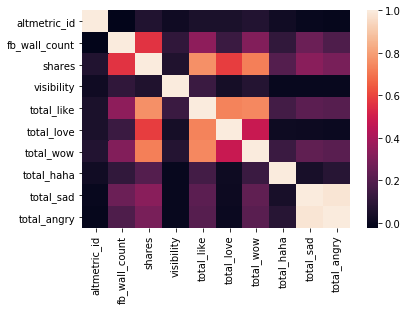

In [135]:
sns.heatmap(df.corr())

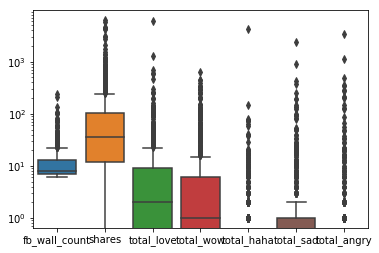

In [172]:
sns.boxplot(data=df.drop(['altmetric_id', 'visibility', 'total_like', 'all_subjects'], axis=1))
plt.yscale('log')
# plt.ylim(0,50)